In [952]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [953]:
tsp_data_txt = open('tsp_dataset.txt')
data = {}
lines = tsp_data_txt.readlines()
distance_matrix = np.zeros((len(lines),len(lines)))
for i,line in enumerate(lines):
    for j,element in enumerate((line.split('\n')[0].split('       '))):
        if(element == ''):
            continue
        
        distance_matrix[i][j-1] = int(element.strip())
data['distance_matrix']= distance_matrix
data['reward_matrix'] = [1 for i  in range(0,len(distance_matrix))]
data['depot'] = 0
data['n_state'] = len(distance_matrix)*len(distance_matrix)
data['n_action'] = len(distance_matrix)
data['visited_nodes'] = [0]


In [954]:
for i in range(0,len(data['distance_matrix'])):
    data['distance_matrix'][i][i] = 9999
    

In [955]:
def initialze_value(env):
    initial_P = 1/(env['n_action']-1)
    env['P'] = {}
    
    #P[state][action] = [(prob, next state, reward, done), ...]
    
    for i in range(0,env['n_state']):
        env['P'][i] ={}
        for j in range(0,env['n_action']):
            env['P'][i][j] = []
            for k in range(0,env['n_action']):
                ini_temp = [initial_P,k,data['reward_matrix'][k],False]
                env['P'][i][j].append(ini_temp)
            
    return env
    

In [956]:
env = initialze_value(data)

In [957]:
env['P'][3][3][3]

[0.07142857142857142, 3, 1, False]

In [958]:
def change_reward(envp):
    for i in range(0,envp['n_action']):
        for j in range(0,envp['n_action']):
            for k in range(0,envp['n_action']):
                if k==0:
                    env['P'][i][j][k][2]= -9999
                    env['P'][i][j][k][3]= True
                    break
    return envp

In [1262]:
def value_iteration(env,gamma=0.99,eps=1e-6):
    V = np.random.uniform(size=(env['n_state'],1))
    tick,V_dists,V_list,Q_list = 0,[],[],[]
    rm_lst = []
    while True:
        #Change_prob
        tick = tick + 1
        Q = np.zeros(shape=(env['n_state'],env['n_action']))
        for s in env['P'].keys():
            env['visited_nodes'] =[]
            for a in env['P'][s].keys():
                for prob, s_prime, reward, done in env['P'][s][a]:
                    if s_prime not  in rm_lst:
                        prob = 10
                    if a in rm_lst:
                        prob = 100
                    Q[s,a] +=(reward*(1/env['distance_matrix'][s//15][a])+ gamma*V[s_prime]*(1/env['distance_matrix'][s//15][a]))*prob        
                    if a not in rm_lst:
                        rm_lst.append(a)
        V_prime = np.max(Q,axis=1)
        V_dist = np.max(np.abs(V*(1/env['distance_matrix'][s//15][a])-V_prime))
        V_dists.append(V_dist)
        V = V_prime # update
        V_list.append(V)
        Q_list.append(Q)
        if V_dist < eps:
            break
        if(tick==100):
            break
    return Q,V,V_dists,V_list,Q_list
        
            
            
            
            
    

In [1263]:
Q,V,V_dists,V_list,Q_list =value_iteration(env)

In [1264]:
Pi = np.zeros((env['n_state'],env['n_action']))
Pi[np.arange(env['n_state']),np.argmax(Q,axis=1)] = 1

In [1265]:
lst =[]
for p in Pi:
    a =np.where(p==1)[0][0]
    lst.append(a)

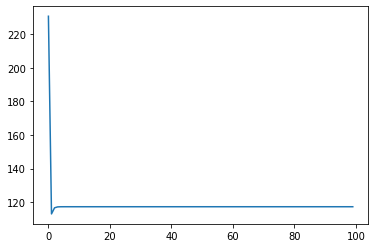

In [1266]:
plt.plot(V_dists)

In [1252]:
Pi[np.arange(env['n_state']),np.argmax(Q,axis=1)] = 1

In [1269]:
# Initialize environment
ret = 0
env['visited_nodes'] =[0]
for tick in range(100):
    obs = np.random.choice(env['n_state'],1)[0]
    action =np.where(Pi[obs][:]==1)[0][0]
    while action in env['visited_nodes']:
        obs = np.random.choice(env['n_state'],1)[0] # select action
        action =np.where(Pi[obs][:]==1)[0][0]
        if action not in env['visited_nodes']:
            break
        
    print("\n tick:[{}]".format(tick))
    print(env['visited_nodes'])
    env['visited_nodes'].append(action)
    #if(len(env['visited_nodes'])==14):
    #    env =change_reward(env)
    #next_obs,reward,done,info = env.step(action)
    #obs = next_obs
    #ret = reward + gamma*ret 
    if len(env['visited_nodes']) >14:
        break


 tick:[0]
[0]

 tick:[1]
[0, 4]

 tick:[2]
[0, 4, 3]

 tick:[3]
[0, 4, 3, 5]

 tick:[4]
[0, 4, 3, 5, 14]

 tick:[5]
[0, 4, 3, 5, 14, 1]

 tick:[6]
[0, 4, 3, 5, 14, 1, 11]

 tick:[7]
[0, 4, 3, 5, 14, 1, 11, 7]

 tick:[8]
[0, 4, 3, 5, 14, 1, 11, 7, 8]

 tick:[9]
[0, 4, 3, 5, 14, 1, 11, 7, 8, 10]

 tick:[10]
[0, 4, 3, 5, 14, 1, 11, 7, 8, 10, 13]

 tick:[11]
[0, 4, 3, 5, 14, 1, 11, 7, 8, 10, 13, 6]

 tick:[12]
[0, 4, 3, 5, 14, 1, 11, 7, 8, 10, 13, 6, 12]

 tick:[13]
[0, 4, 3, 5, 14, 1, 11, 7, 8, 10, 13, 6, 12, 2]


In [1270]:
len(env['visited_nodes'])

15

In [1271]:
np.random.choice(224,1)[0]

196

In [1272]:
env['visited_nodes']

[0, 4, 3, 5, 14, 1, 11, 7, 8, 10, 13, 6, 12, 2, 9]

In [1273]:
Pi[11]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])